In [ ]:
!pip install seaborn
!pip install xgboost
!pip install --upgrade xgboost
!pip install catboost
!pip install pycaret #pycaret 설치
!pip install category_encoders
# !pip install --upgrade pycaret

In [2]:
import pandas as pd
import numpy as np
from category_encoders.ordinal import OrdinalEncoder
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from preprocess import preprocess

In [ ]:
!pip install wandb
import wandb
wandb.login()
wandb.init(project="automl")

In [24]:
df_train = pd.read_csv("train.csv")  # 학습용 데이터
df_test = pd.read_csv("submission.csv")  # 테스트 데이터(제출파일의 데이터)
print(f"train : {df_train.shape}")
print(f"test : {df_test.shape}")
df_test_id = df_test['id']
df_test_no_id = df_test.drop(columns=['id'])
df_all = pd.concat([df_train, df_test_no_id])
print(f"all : {df_all.shape}")

train : (59299, 29)
test : (5271, 30)
all : (64570, 29)


In [25]:
df_all = df_all.reset_index(drop=True)


In [6]:
df_all

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64565,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,False
64566,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,True
64567,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,False
64568,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,False


In [26]:
# 데이터 전처리
df_all = preprocess(df_all)
# 훈련, 테스트 셋 분리
df_train_p = df_all.iloc[:len(df_train), :]
df_test_p = df_all.iloc[len(df_train):, :]
print(f"train : {df_train_p.shape}")
print(f"test : {df_test_p.shape}")

train : (59299, 22)
test : (5271, 22)


In [8]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_p,
    df_train_p["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=400,
)

In [9]:
x_train.head()

,bant_submit,customer_country,business_unit,customer_idx,customer_type,enterprise_Enterprise,enterprise_SMB,historical_existing_cnt,customer_job,lead_desc_length,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
34519,0.75,1016,2,20529,1,1,0,0.0,1,136,...,10,11,1,0,0,0.000000,0.000000,13,198,False
40183,0.50,2067,1,24182,30,0,1,0.0,7,14,...,10,6,2,0,0,0.000000,0.000000,13,98,False
46710,0.50,141,1,51,6,1,0,16.0,190,185,...,8,20,5,0,0,0.000000,0.000000,13,121,False
42036,0.25,4066,1,51,1,1,0,105.0,190,46,...,8,28,2,0,0,0.000000,0.000000,13,628,False
27127,0.25,5573,2,15428,30,1,0,0.0,190,51,...,2,6,2,0,0,0.000717,0.071345,3,432,False


In [10]:
## 모델 정의
model = setup(
    data = x_train,
    test_data = x_val,
    normalize_method='minmax', 
    target = "is_converted",
    fold = 15,
    # log_experiment="wandb",
    # log_plots= True,
    # log_profile=True,
    # log_data=True,
    # experiment_name="teststst"
)


,Description,Value
0,Session id,8831
1,Target,is_converted
2,Target type,Binary
3,Original data shape,"(59299, 22)"
4,Transformed data shape,"(59299, 22)"
5,Transformed train set shape,"(53369, 22)"
6,Transformed test set shape,"(5930, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [11]:
top3_model = compare_models(
               round=4,
               sort="F1",
               n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9789,0.9917,0.8031,0.9310,0.8620,0.8507,0.8536,0.2573
rf,Random Forest Classifier,0.9790,0.9904,0.7784,0.9575,0.8585,0.8473,0.8527,1.5500
dt,Decision Tree Classifier,0.9751,0.9231,0.8583,0.8423,0.8500,0.8364,0.8366,0.1300
lightgbm,Light Gradient Boosting Machine,0.9758,0.9900,0.7543,0.9399,0.8365,0.8236,0.8296,94.7100
et,Extra Trees Classifier,0.9734,0.9803,0.7264,0.9363,0.8177,0.8037,0.8114,1.0160
gbc,Gradient Boosting Classifier,0.9698,0.9790,0.6557,0.9663,0.7809,0.7654,0.7822,2.5613
knn,K Neighbors Classifier,0.9666,0.9352,0.7109,0.8585,0.7774,0.7595,0.7637,0.6687
ada,Ada Boost Classifier,0.9619,0.9643,0.5850,0.9240,0.7160,0.6967,0.7179,0.6773
svm,SVM - Linear Kernel,0.9069,0.0000,0.2283,0.4257,0.2848,0.2408,0.2603,0.4260
nb,Naive Bayes,0.8686,0.7416,0.1636,0.1776,0.1699,0.0988,0.0991,0.0340


In [13]:
tuned_top3 = [tune_model(i) for i in top3_model]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9711,0.9893,0.8938,0.7838,0.8352,0.8194,0.8215
1,0.9663,0.9795,0.8630,0.7590,0.8077,0.7893,0.7912
2,0.9677,0.9890,0.8973,0.7550,0.8200,0.8024,0.8060
3,0.9694,0.9867,0.8973,0.7683,0.8278,0.8111,0.8140
4,0.9739,0.9903,0.9144,0.7970,0.8517,0.8374,0.8398
5,0.9722,0.9785,0.8664,0.8083,0.8364,0.8212,0.8218
6,0.9727,0.9890,0.9144,0.7876,0.8463,0.8314,0.8342
7,0.9730,0.9886,0.8973,0.7988,0.8452,0.8304,0.8321
8,0.9691,0.9872,0.9041,0.7630,0.8276,0.8107,0.8143


Fitting 15 folds for each of 10 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9562,0.9386,0.4658,1.0000,0.6355,0.6155,0.6667
1,0.9525,0.9317,0.4212,1.0000,0.5928,0.5719,0.6329
2,0.9539,0.9319,0.4384,1.0000,0.6095,0.5890,0.6461
3,0.9533,0.9472,0.4315,1.0000,0.6029,0.5822,0.6408
4,0.9547,0.9540,0.4486,1.0000,0.6194,0.5990,0.6539
5,0.9503,0.9285,0.3938,1.0000,0.5651,0.5440,0.6112
6,0.9556,0.9442,0.4589,1.0000,0.6291,0.6089,0.6616
7,0.9547,0.9500,0.4486,1.0000,0.6194,0.5990,0.6539
8,0.9539,0.9563,0.4418,0.9923,0.6114,0.5907,0.6458


Fitting 15 folds for each of 10 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.8047,0.3870,0.9741,0.5539,0.5321,0.5967
1,0.9458,0.7587,0.3459,0.9806,0.5114,0.4895,0.5652
2,0.9452,0.7578,0.3425,0.9709,0.5063,0.4843,0.5591
3,0.9545,0.8052,0.4589,0.9710,0.6233,0.6023,0.6506
4,0.9488,0.8093,0.3904,0.9661,0.5561,0.5341,0.5965
5,0.9410,0.7386,0.2808,1.0000,0.4385,0.4175,0.5137
6,0.9458,0.7764,0.3493,0.9714,0.5139,0.4918,0.5650
7,0.9477,0.7938,0.3699,0.9818,0.5373,0.5156,0.5855
8,0.9460,0.7504,0.3493,0.9808,0.5152,0.4933,0.5682


Fitting 15 folds for each of 10 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


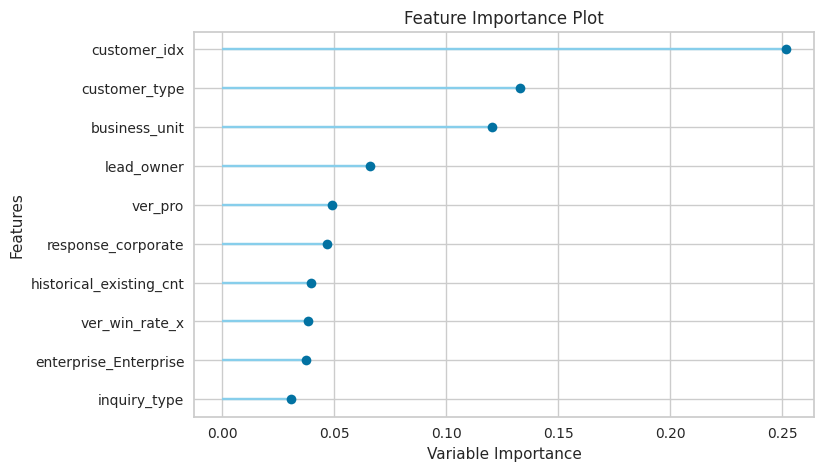

In [15]:
plot_model(tuned_top3[0], plot = 'feature')

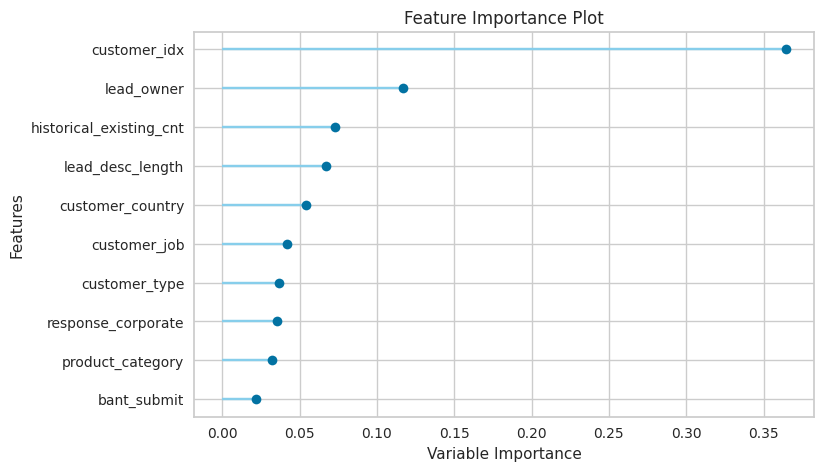

In [16]:
plot_model(tuned_top3[1], plot = 'feature')

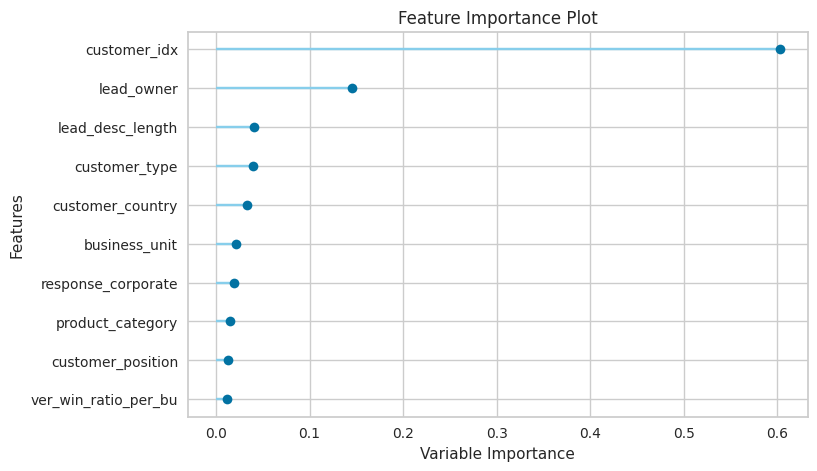

In [17]:
plot_model(tuned_top3[2], plot = 'feature')

In [18]:
# rf = create_model('rf')
# lightgbm = create_model('lightgbm')
# et = create_model('et')
# # xgboost = create_model('xgboost')
# dt = create_model('dt')

blended_model = blend_models(estimator_list = tuned_top3)


final_model = finalize_model(blended_model)
final_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9803,0.9914,0.8253,0.9269,0.8732,0.8626,0.8643
1,0.9806,0.9925,0.8219,0.9339,0.8743,0.8639,0.8659
2,0.9820,0.9944,0.8562,0.9191,0.8865,0.8768,0.8774
3,0.9831,0.9931,0.8699,0.9203,0.8944,0.8852,0.8856
4,0.9837,0.9945,0.8630,0.9333,0.8968,0.8880,0.8888
5,0.9812,0.9878,0.8288,0.9344,0.8784,0.8682,0.8701
6,0.9845,0.9957,0.8664,0.9405,0.9020,0.8936,0.8945
7,0.9800,0.9937,0.8322,0.9170,0.8725,0.8617,0.8629
8,0.9843,0.9932,0.8836,0.9214,0.9021,0.8935,0.8938


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['bant_submit', 'customer_country',
                                             'business_unit', 'customer_idx',
                                             'customer_type',
                                             'enterprise_Enterprise',
                                             'enterprise_SMB',
                                             'historical_existing_cnt',
                                             'customer_job', 'lead_desc_length',
                                             'inquiry_type', 'product_category',
                                             'customer_position',
                                             'respons...
                                              ('Decision Tree Classifier',
                                               DecisionTreeClassifier(ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features=None,
                                                                      max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_samples_leaf=1,
                                                                      min_samples_split=2,
                                                                      min_weight_fraction_leaf=0.0,
                                                                      random_state=8831,
                                                                      splitter='best'))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

In [19]:
df_test_p = df_test_p.reset_index(drop=True)
df_test_p

,bant_submit,customer_country,business_unit,customer_idx,customer_type,enterprise_Enterprise,enterprise_SMB,historical_existing_cnt,customer_job,lead_desc_length,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
0,0.00,5219,2,51,6,1,0,53.0,5,3,...,8,6,2,1,0,0.001183,0.049840,8,262,False
1,0.25,2,3,13020,6,0,1,0.0,190,23,...,8,9,2,0,0,0.000013,0.000000,11,380,True
2,1.00,5220,2,35113,2,0,1,0.0,12,138,...,4,7,1,0,0,0.000060,0.131148,4,985,True
3,0.50,2,2,35114,30,1,0,0.0,7,3,...,8,9,5,0,0,0.001183,0.049840,8,178,False
4,1.00,5221,2,35115,6,1,0,2.0,3,107,...,13,6,1,1,1,0.003079,0.064566,1,151,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,200,1,9125,30,1,0,10.0,7,7,...,6,6,2,0,0,0.000000,0.000000,13,98,False
5267,0.25,5322,3,51,30,1,0,0.0,190,157,...,8,9,2,0,0,0.000000,0.000000,13,736,True
5268,0.75,2,1,38734,2,1,0,0.0,4,39,...,4,6,1,0,0,0.000000,0.000000,13,98,False
5269,0.00,5222,3,38735,6,0,1,0.0,190,3,...,8,25,2,0,0,0.000000,0.000000,13,726,False


In [20]:
predictions = []

# 예측에 필요한 데이터 분리
pred = predict_model(final_model, data=df_test_p)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9590,0.9823,0.8986,0.8159,0.8552,0.8314,0.8327


In [21]:
pred

,bant_submit,customer_country,business_unit,customer_idx,customer_type,enterprise_Enterprise,enterprise_SMB,historical_existing_cnt,customer_job,lead_desc_length,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted,prediction_label,prediction_score
0,0.00,5219,2,51,6,1,0,53.0,5,3,...,2,1,0,0.001183,0.049840,8,262,False,0,0.8365
1,0.25,2,3,13020,6,0,1,0.0,190,23,...,2,0,0,0.000013,0.000000,11,380,True,1,0.8686
2,1.00,5220,2,35113,2,0,1,0.0,12,138,...,1,0,0,0.000060,0.131148,4,985,True,1,0.6492
3,0.50,2,2,35114,30,1,0,0.0,7,3,...,5,0,0,0.001183,0.049840,8,178,False,0,0.6466
4,1.00,5221,2,35115,6,1,0,2.0,3,107,...,1,1,1,0.003079,0.064566,1,151,False,0,0.8625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,200,1,9125,30,1,0,10.0,7,7,...,2,0,0,0.000000,0.000000,13,98,False,0,0.9998
5267,0.25,5322,3,51,30,1,0,0.0,190,157,...,2,0,0,0.000000,0.000000,13,736,True,1,0.8329
5268,0.75,2,1,38734,2,1,0,0.0,4,39,...,1,0,0,0.000000,0.000000,13,98,False,0,0.9825
5269,0.00,5222,3,38735,6,0,1,0.0,190,3,...,2,0,0,0.000000,0.000000,13,726,False,0,0.6877


In [22]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = pred["prediction_label"].astype(bool)

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

In [23]:
result = pd.read_csv("submission.csv")
result

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,/ / Brazil,ID,0.073248,47466,End Customer,Enterprise,53.0,NaN,...,LGESP,NaN,1,0,0.001183,0.049840,retail,Electronics & Telco,278,False
1,9738,0.25,400 N State Of Franklin Rd Cloud IT / Johnson...,IT,NaN,5405,End Customer,SMB,NaN,NaN,...,LGEUS,NaN,0,0,0.000013,NaN,transportation,Others,437,True
2,8491,1.00,/ / U.A.E,ID,NaN,13597,Specifier/ Influencer,SMB,NaN,NaN,...,LGEGF,less than 3 months,0,0,0.000060,0.131148,hospital & health care,General Hospital,874,True
3,19895,0.50,/ Madison / United States,ID,0.118644,17204,NaN,Enterprise,NaN,NaN,...,LGEUS,more than a year,0,0,0.001183,0.049840,retail,NaN,194,False
4,10465,1.00,/ Sao Paulo / Brazil,ID,0.074949,2329,End Customer,Enterprise,2.0,1.0,...,LGESP,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,167,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13855,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,False
5267,7979,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,True
5268,12887,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,False
5269,17530,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,False


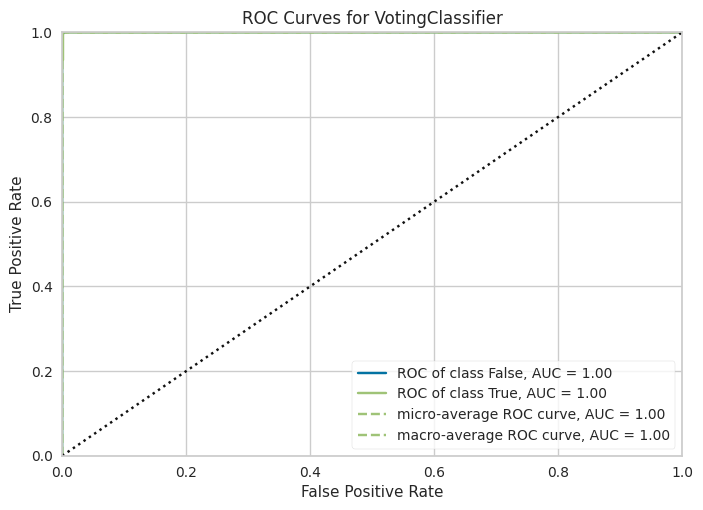

In [22]:
# AUC plot
plot_model(final_model, plot = 'auc')


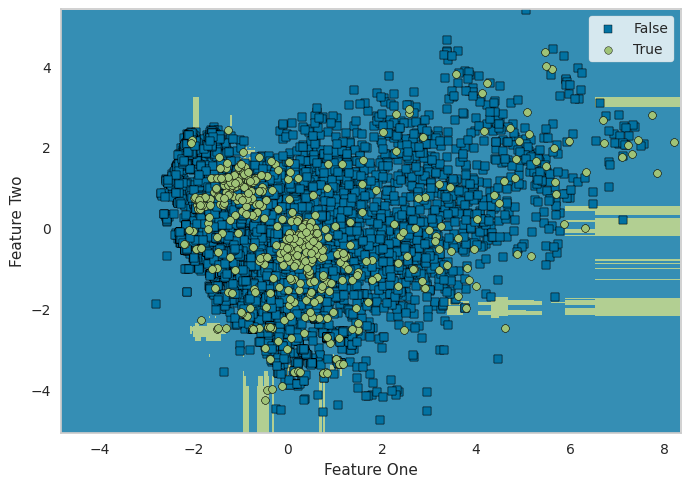

In [ ]:
# Decision Boundary
plot_model(final_model, plot = 'boundary')

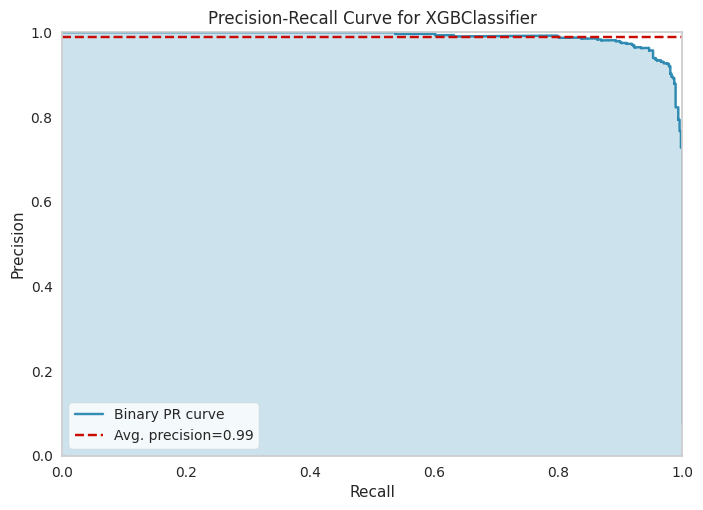

In [ ]:
# Precision Recall Curve
plot_model(final_model, plot = 'pr')

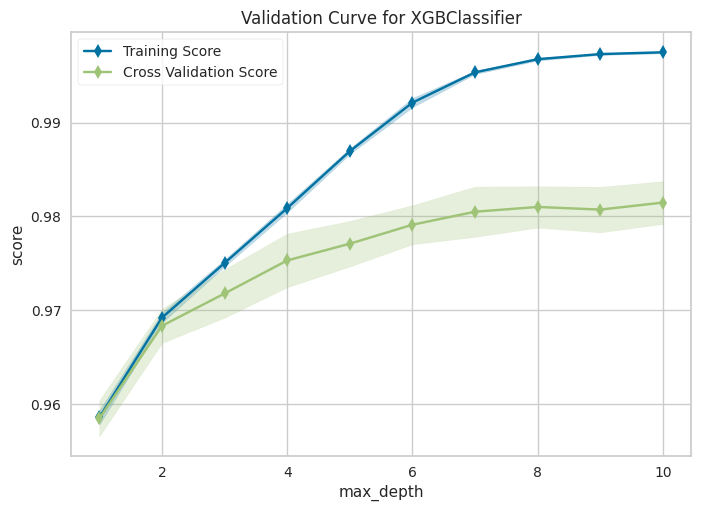

In [ ]:
# Validation Curve
plot_model(final_model, plot = 'vc')

In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install pycaret[analysis]
interpret_model(final_model)

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [ ]:
save_model(final_model, model_name = 'xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['bant_submit', 'customer_country',
                                              'business_unit', 'customer_idx',
                                              'customer_type',
                                              'enterprise_Enterprise',
                                              'enterprise_SMB',
                                              'historical_existing_cnt',
                                              'customer_job', 'lead_desc_length',
                                              'inquiry_type', 'product_category',
                                              'customer_position',
                                              'respons...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
              